In [15]:
# To visualize the data, we will use the pymatviz package
# ! pip install pymatviz

In [51]:
import numpy as np
import pandas as pd
from ast import literal_eval

from pymatgen.core import Structure
from pymatviz import StructureWidget
from pymatviz import structure_3d

In [102]:
data = pd.read_csv('~/private/datafile/crystalgpt/csp/alex20/csp-e478c/adam_bs_8000_lr_0.0001_decay_0_clip_1_A_119_W_28_N_21_a_1_w_1_l_1_Nf_5_Kx_16_Kl_4_h0_64_l_8_H_16_k_64_m_64_e_32_drop_0.3_0.1/output_C_struct.csv')
cif_strings = data['cif']   # string of pymatgen structure dict



In [103]:
structures =[Structure.from_dict(literal_eval(cif)) for cif in cif_strings]

Analyzing space groups for all structures...
Failed to analyze structure 132
Failed to analyze structure 143
Failed to analyze structure 167
Failed to analyze structure 184
Failed to analyze structure 185
Failed to analyze structure 211
Failed to analyze structure 215
Failed to analyze structure 221
Failed to analyze structure 229
Failed to analyze structure 260
Failed to analyze structure 265
Failed to analyze structure 335
Failed to analyze structure 343
Failed to analyze structure 349
Failed to analyze structure 367
Failed to analyze structure 380
Failed to analyze structure 387
Failed to analyze structure 400
Failed to analyze structure 409
Failed to analyze structure 410
Failed to analyze structure 418
Failed to analyze structure 431
Failed to analyze structure 438
Failed to analyze structure 443
Failed to analyze structure 455
Failed to analyze structure 477
Failed to analyze structure 489
Failed to analyze structure 511
Failed to analyze structure 519
Failed to analyze structure

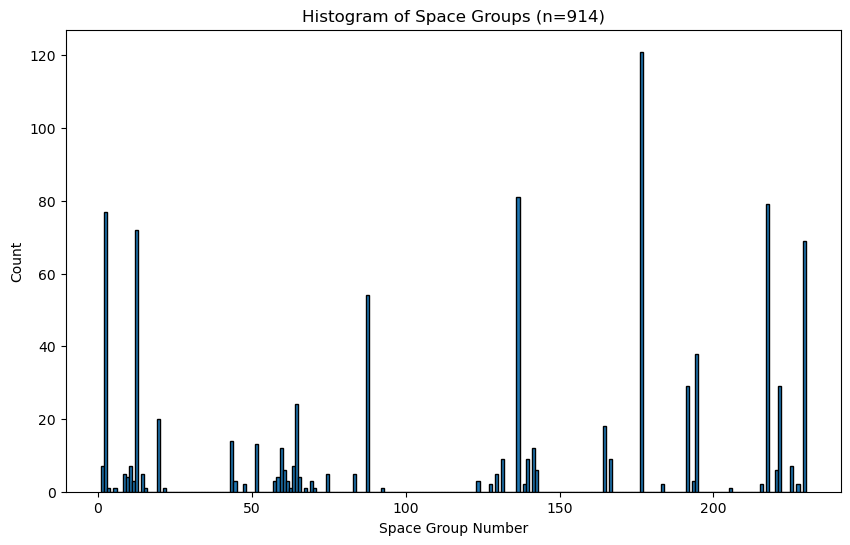

\nSpace Group Analysis Summary:
Total structures analyzed: 914
Unique space groups: 57
Most common space group: 176


In [104]:
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
import matplotlib.pyplot as plt
import warnings

def get_space_group_safe(structure, symprec=0.1, angle_tolerance=5.0):
    """
    Safely get space group number with error handling for problematic structures
    
    Args:
        structure: pymatgen Structure object
        symprec: Symmetry precision (default 0.1)
        angle_tolerance: Angle tolerance in degrees (default 5.0)
    
    Returns:
        Space group number or None if analysis fails
    """
    try:
        # First check for very close atoms that might cause issues
        coords = structure.cart_coords
        min_dist = float('inf')
        
        for i in range(len(coords)):
            for j in range(i+1, len(coords)):
                dist = np.linalg.norm(coords[i] - coords[j])
                min_dist = min(min_dist, dist)
        
        # If atoms are too close (< 0.5 Å), skip this structure
        if min_dist < 0.5:
            print(f"Warning: Structure has atoms too close ({min_dist:.3f} Å), skipping space group analysis")
            return None
        
        # Try with default parameters first
        analyzer = SpacegroupAnalyzer(structure, symprec=symprec, angle_tolerance=angle_tolerance)
        return analyzer.get_space_group_number()
        
    except Exception as e:
        print(f"Space group analysis failed: {str(e)}")
        
        # Try with more relaxed parameters
        try:
            print("Trying with relaxed symmetry parameters...")
            analyzer = SpacegroupAnalyzer(structure, symprec=0.2, angle_tolerance=10.0)
            return analyzer.get_space_group_number()
        except Exception as e2:
            print(f"Space group analysis failed even with relaxed parameters: {str(e2)}")
            return None

# Get space group numbers for all structures with error handling
print("Analyzing space groups for all structures...")
spacegroup_numbers = []
failed_structures = []

for i, struct in enumerate(structures):
    sg_num = get_space_group_safe(struct)
    if sg_num is not None:
        spacegroup_numbers.append(sg_num)
    else:
        failed_structures.append(i)
        print(f"Failed to analyze structure {i}")

print(f"Successfully analyzed {len(spacegroup_numbers)} out of {len(structures)} structures")
if failed_structures:
    print(f"Failed structures: {failed_structures}")

# Plot histogram of space group numbers
if spacegroup_numbers:
    plt.figure(figsize=(10,6))
    plt.hist(spacegroup_numbers, bins=range(min(spacegroup_numbers), max(spacegroup_numbers)+2), edgecolor='black')
    plt.xlabel('Space Group Number')
    plt.ylabel('Count')
    plt.title(f'Histogram of Space Groups (n={len(spacegroup_numbers)})')
    plt.show()
    
    # Print summary statistics
    print(f"\\nSpace Group Analysis Summary:")
    print(f"Total structures analyzed: {len(spacegroup_numbers)}")
    print(f"Unique space groups: {len(set(spacegroup_numbers))}")
    print(f"Most common space group: {max(set(spacegroup_numbers), key=spacegroup_numbers.count)}")
else:
    print("No structures could be analyzed for space groups")


In [105]:

structure_3d(structures[:6], n_cols=1)